In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pywt
from scipy.io import loadmat

In [58]:
# Load sample ECG data from the downloaded MATLAB file
mat = loadmat('waveforms/EL82_WAV_000.mat')

data = mat['wave'][0][0][13][1]

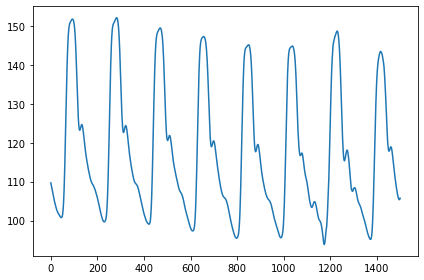

In [60]:
plt.plot(data[0:1500])
    
plt.tight_layout()
plt.show()

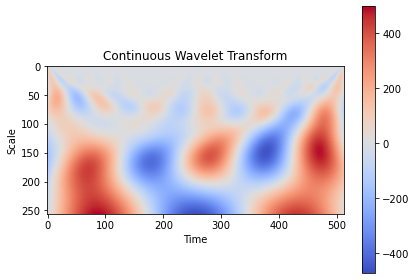

In [80]:
# Generate and Plot Continuous Wavelet Transform (CWT)
num_steps = 256
scales = np.arange(1, num_steps+1)
wavelet_type = 'morl' # https://pywavelets.readthedocs.io/en/latest/ref/wavelets.html

fig, axes = plt.subplots(2, 1, figsize=(10, 10))

coefs, freqs = pywt.cwt(data[0:512], scales, wavelet_type)
im = axes[0].imshow(coefs, cmap='coolwarm')
plt.colorbar(im, ax=axes[0])
axes[0].set_xlabel('Time*128 (s)')
axes[0].set_ylabel('Scale')
axes[0].set_title('Continuous Wavelet Transform')

coefs, freqs = pywt.dwt(data[0:512], wavelet_type)
im = axes[0].imshow(coefs, cmap='coolwarm')
plt.colorbar(im, ax=axes[0])
axes[0].set_xlabel('Time*128 (s)')
axes[0].set_ylabel('Scale')
axes[0].set_title('Continuous Wavelet Transform')

plt.tight_layout()
plt.show()